# Linear Regression

## Basic Error Metrics

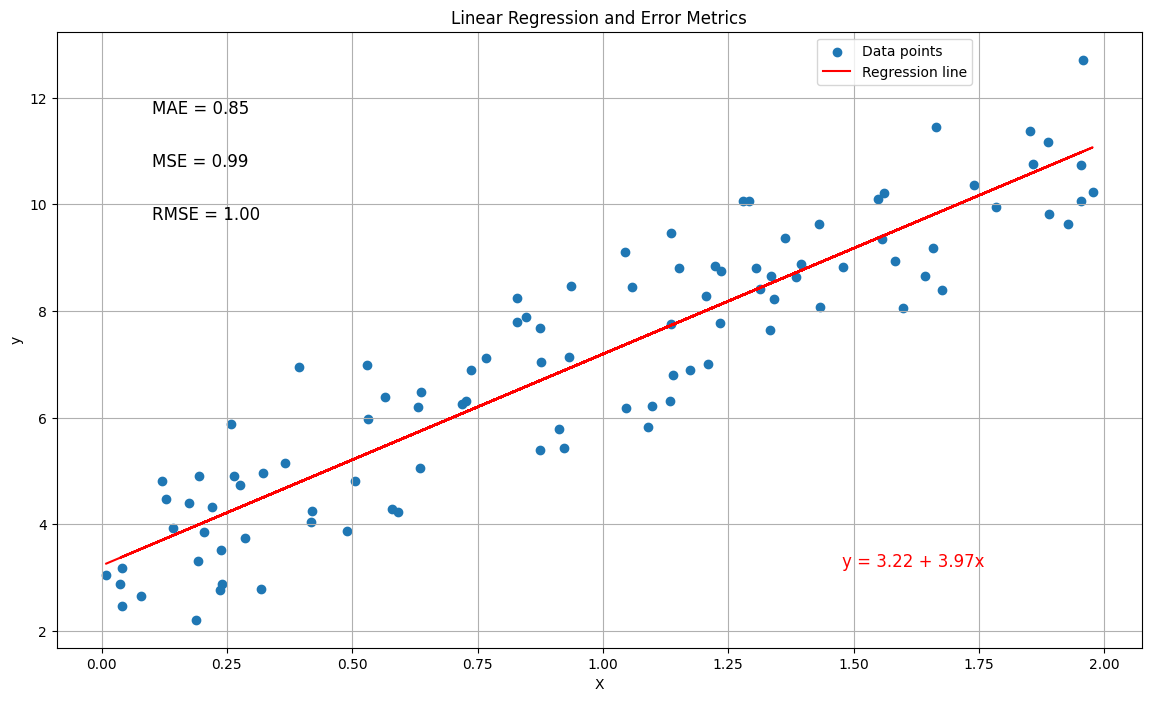

('y = 3.22 + 3.97x', 0.849258198323929, 0.9924386487246483, 0.9962121504602562)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data for linear regression
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 3 + 4 * X + np.random.randn(100, 1)

# Perform linear regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred = lin_reg.predict(X)

# Calculate the regression equation
slope = lin_reg.coef_[0][0]
intercept = lin_reg.intercept_[0]
regression_eq = f"y = {intercept:.2f} + {slope:.2f}x"

# Calculate MAE, MSE, RMSE
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = sqrt(mse)

# Create the plot
plt.figure(figsize=(14, 8))
plt.scatter(X, y, label='Data points')
plt.plot(X, y_pred, color='red', label='Regression line')
plt.xlabel('X')
plt.ylabel('y')

# Annotate MAE, MSE, RMSE
plt.annotate(f"MAE = {mae:.2f}", xy=(0.1, y.max() - 1), fontsize=12)
plt.annotate(f"MSE = {mse:.2f}", xy=(0.1, y.max() - 2), fontsize=12)
plt.annotate(f"RMSE = {rmse:.2f}", xy=(0.1, y.max() - 3), fontsize=12)

# Annotate the regression equation
plt.annotate(regression_eq, xy=(X.max() - 0.5, y.min() + 1), fontsize=12, color='red')

plt.title('Linear Regression and Error Metrics')
plt.legend(bbox_to_anchor=(.85, 1))
plt.grid(True)
plt.show()

regression_eq, mae, mse, rmse

## R^2 and Adjusted R^2

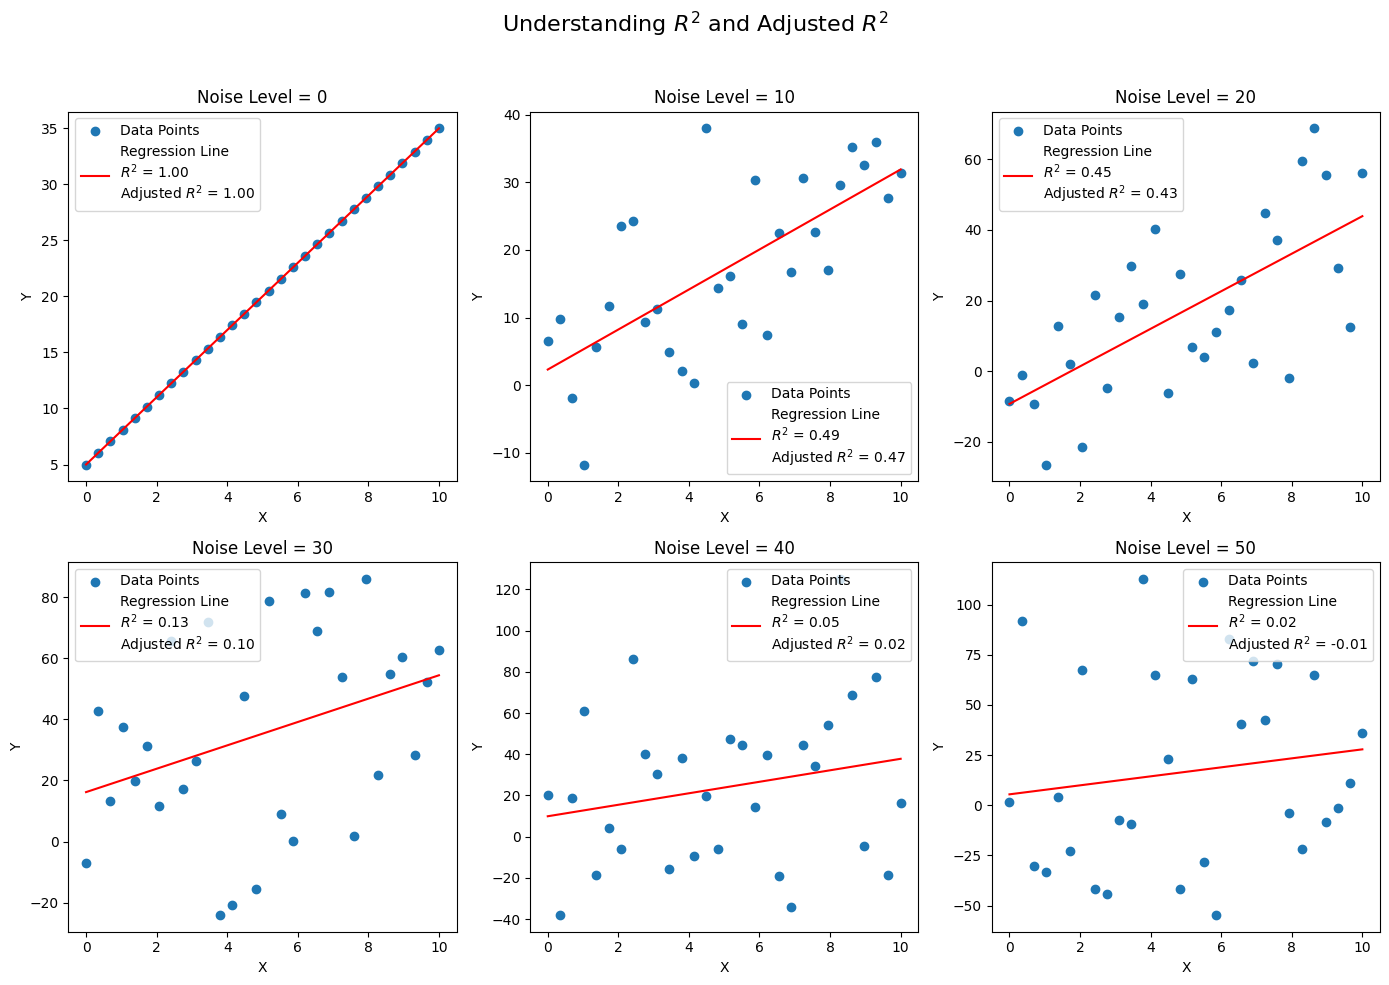

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Function to calculate Adjusted R-squared
def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * ((n - 1) / (n - p - 1))

# Data generation
np.random.seed(0)
x = np.linspace(0, 10, 30)
y_perfect = 3 * x + 5

# Noise levels
noise_levels = [0, 10, 20, 30, 40, 50]

# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(14, 10))
fig.suptitle("Understanding $R^2$ and Adjusted $R^2$", fontsize=16)

# Loop through subplots to create different noise levels
for i, noise_level in enumerate(noise_levels):
    row = i // 3
    col = i % 3
    y = y_perfect + np.random.normal(0, noise_level, len(x))
    
    # Linear Regression
    x_reshaped = x.reshape(-1, 1)
    reg = LinearRegression().fit(x_reshaped, y)
    y_pred = reg.predict(x_reshaped)
    
    # Metrics
    r2 = r2_score(y, y_pred)
    adj_r2 = adjusted_r2(r2, len(y), 1)
    
    # Plotting
    axs[row,col].scatter(x, y, label='Data Points')
    axs[row,col].plot(x, y_pred, color='r', label=f"Regression Line\n$R^2$ = {r2:.2f}\nAdjusted $R^2$ = {adj_r2:.2f}")
    axs[row,col].set_title(f"Noise Level = {noise_level}")
    axs[row,col].set_xlabel("X")
    axs[row,col].set_ylabel("Y")
    axs[row,col].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## AIC, BIC, and R^2

In [2]:
# Only run this if you need to install statsmodels
!pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 60.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 10.9 MB/s eta 0:00:00


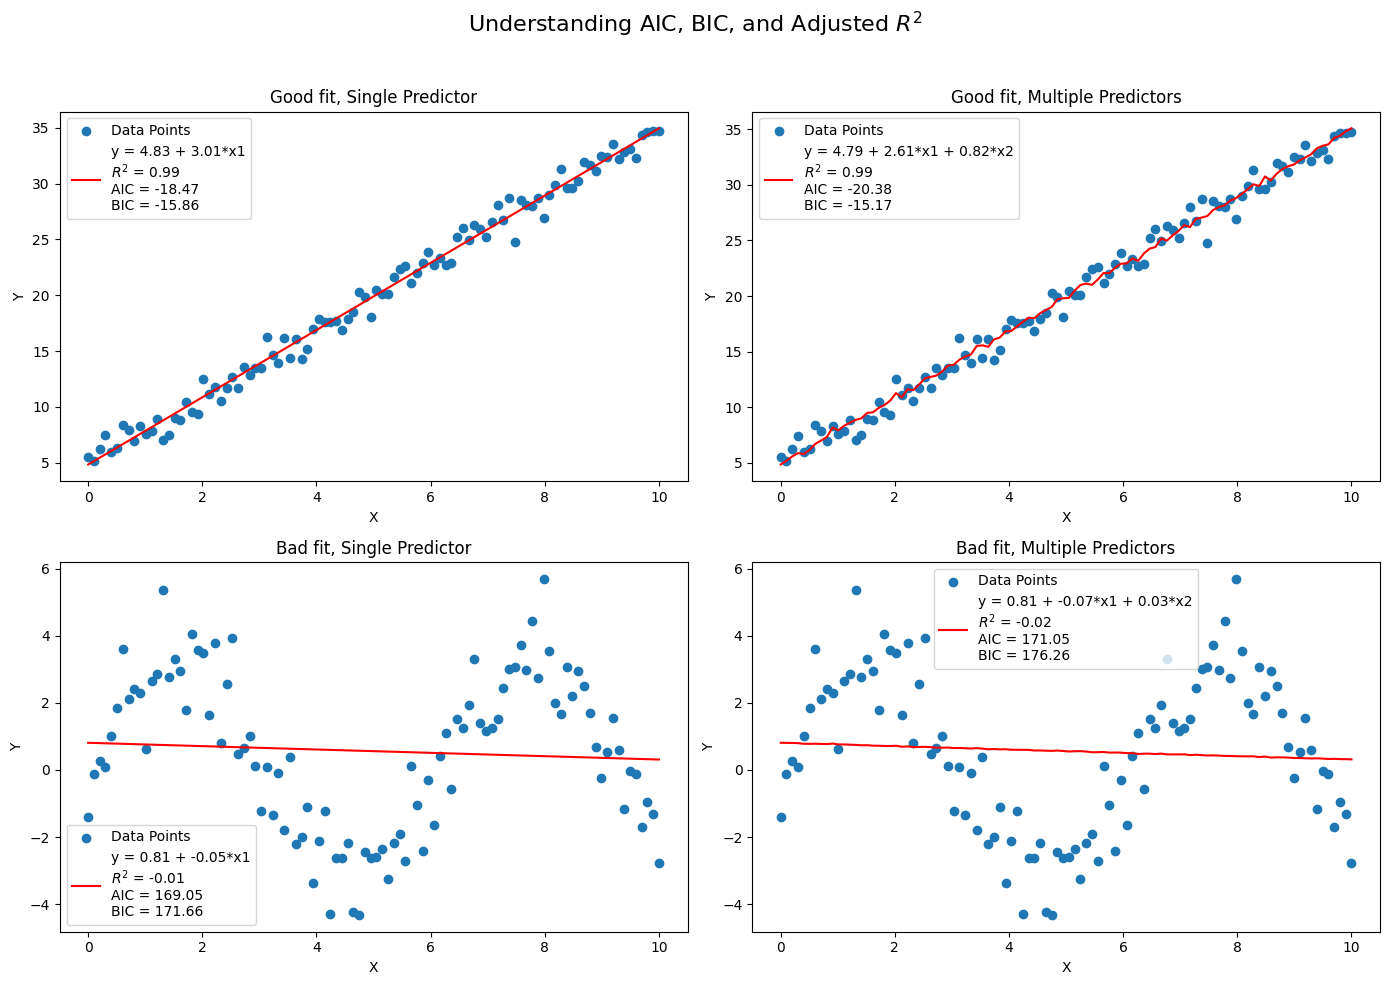

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Data generation
np.random.seed(42)
x = np.linspace(0, 10, 100)
y_good_fit = 3 * x + 5 + np.random.normal(0, 1, len(x))
y_bad_fit = 3 * np.sin(x) + np.random.normal(0, 1, len(x))

# Extra feature for multiple predictor scenario
x_extra = 0.5 * x + 0.2 * np.random.normal(0, 1, len(x))

# Function to calculate AIC and BIC
def calc_aic_bic(y, y_pred, p):
    resid = y - y_pred
    sse = sum(resid**2)
    n = len(y)
    aic = n * np.log(sse/n) + 2*p
    bic = n * np.log(sse/n) + np.log(n)*p
    return aic, bic

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Understanding AIC, BIC, and Adjusted $R^2$", fontsize=16)

# Scenarios: ["Good fit, Single Predictor", "Good fit, Multiple Predictors", "Bad fit, Single Predictor", "Bad fit, Multiple Predictors"]
scenarios = [(y_good_fit, x.reshape(-1, 1), 'Good fit, Single Predictor'), 
             (y_good_fit, np.column_stack((x, x_extra)), 'Good fit, Multiple Predictors'), 
             (y_bad_fit, x.reshape(-1, 1), 'Bad fit, Single Predictor'), 
             (y_bad_fit, np.column_stack((x, x_extra)), 'Bad fit, Multiple Predictors')]

# Loop through subplots to create different scenarios
for i, (y, X, title) in enumerate(scenarios):
    ax = axs.flatten()[i]
    model = sm.OLS(y, sm.add_constant(X)).fit()
    y_pred = model.predict(sm.add_constant(X))
    
    # Coefficients for the regression formula
    coeffs = model.params
    formula = f"y = {coeffs[0]:.2f}"
    for j in range(1, len(coeffs)):
        formula += f" + {coeffs[j]:.2f}*x{j}"
    
    # Calculate R-squared, AIC, BIC
    r2 = model.rsquared_adj
    aic, bic = calc_aic_bic(y, y_pred, model.df_model)
    
    # Plotting
    ax.scatter(x, y, label='Data Points')
    ax.plot(x, y_pred, color='r', label=f"{formula}\n$R^2$ = {r2:.2f}\nAIC = {aic:.2f}\nBIC = {bic:.2f}")
    
    #ax.plot(x, y_pred, color='r', label=f"Regression Line\n$R^2$ = {r2:.2f}\nAIC = {aic:.2f}\nBIC = {bic:.2f}")
    ax.set_title(title)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Examining Significance

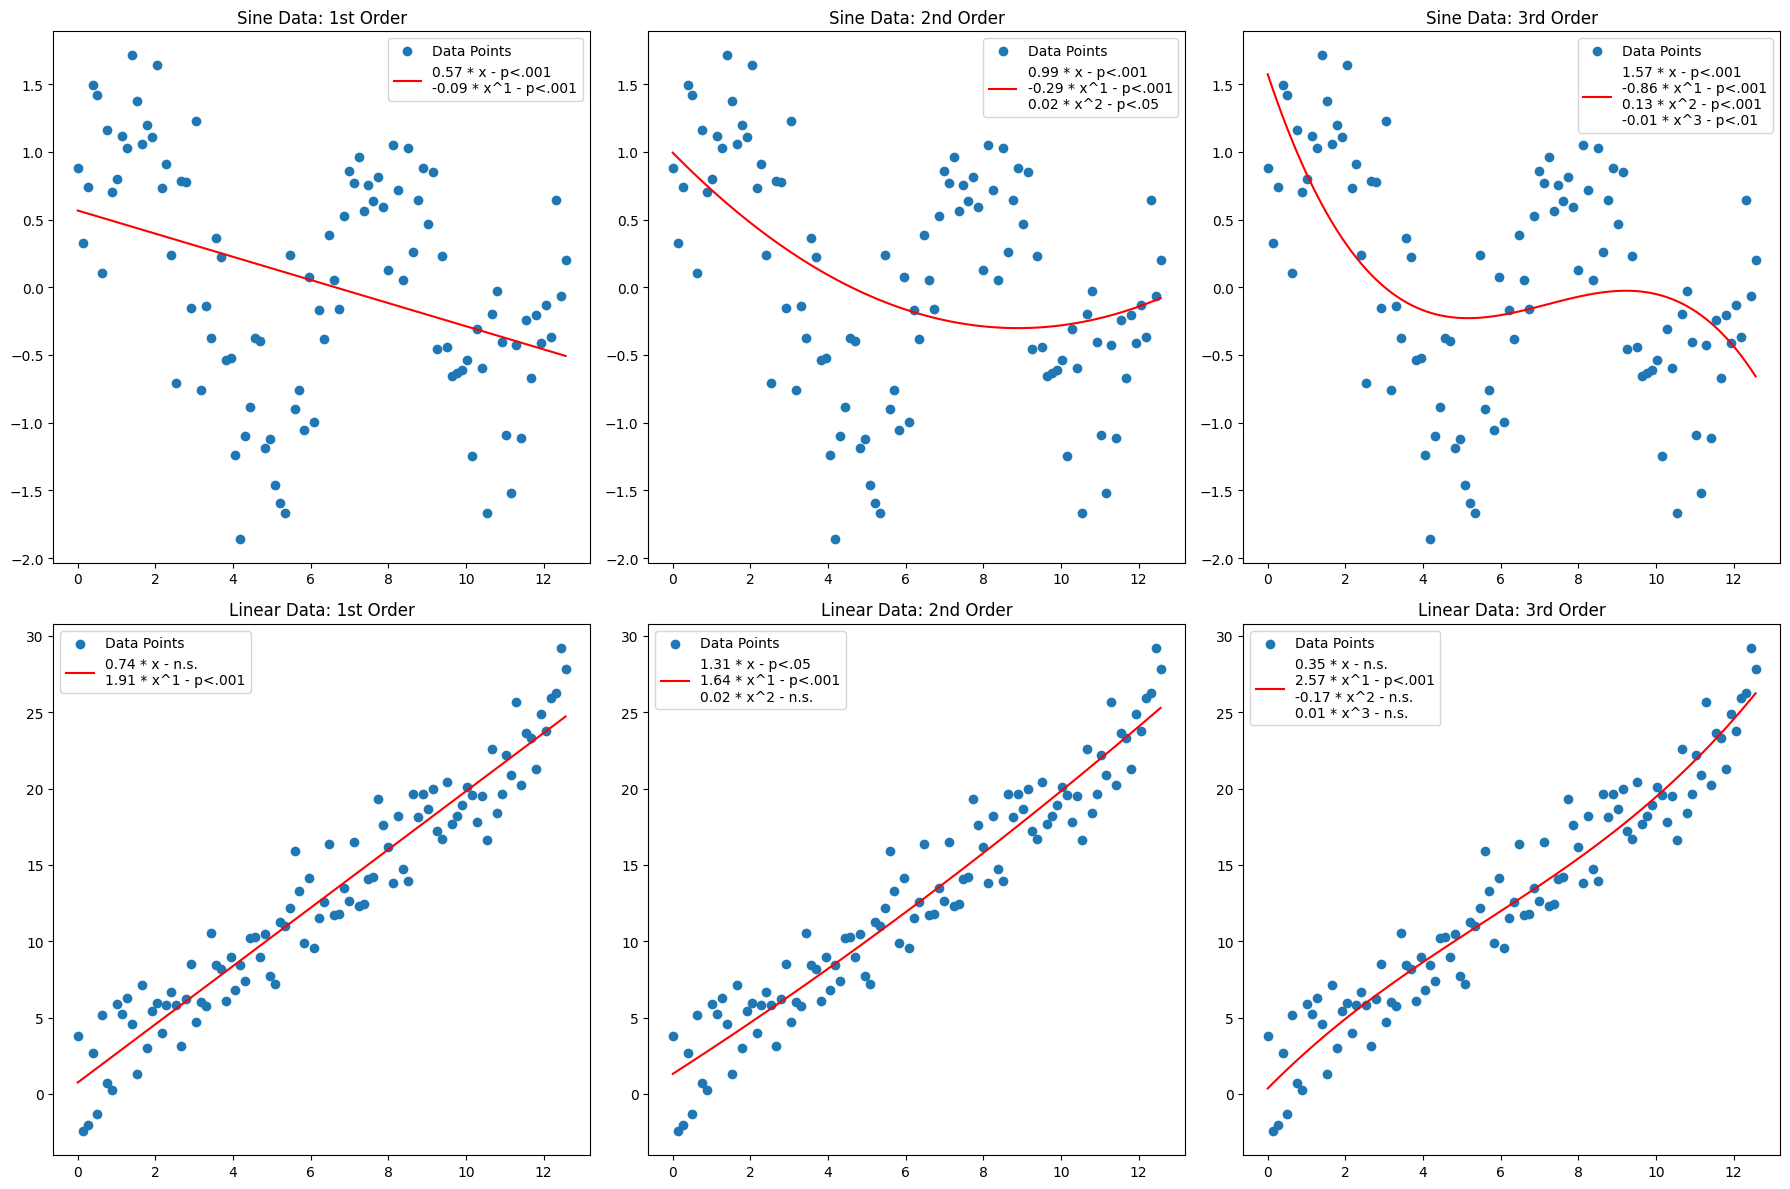

In [4]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

# Function to fit polynomial and return p-values
def fit_and_get_coeffs(x, y, degree):
    x_poly = np.column_stack([x**i for i in range(degree + 1)])
    model = sm.OLS(y, x_poly).fit()
    return model.params, model.pvalues
    print(model.params)
    return model.pvalues[-1]

def format_legend_text(coefficients, p_values):
    formatted_text = []
    for i, (coef, p_value) in enumerate(zip(coefficients, p_values)):
        # Convert p-value to conventional scientific notation
        if p_value >= 0.05:
            p_text = "n.s."
        elif p_value < 0.05 and p_value >= 0.01:
            p_text = "p<.05"
        elif p_value < 0.01 and p_value >= 0.001:
            p_text = "p<.01"
        else:
            p_text = "p<.001"
        
        # Format coefficient and power of x
        coef_text = f"{coef:.2f} * x"
        if i > 0:
            coef_text += f"^{i}"
        
        # Combine to create legend text
        formatted_text.append(f"{coef_text} - {p_text}")
    
    return formatted_text

# Seed for reproducibility
np.random.seed(0)

# Data generation parameters
n_points = 100
x = np.linspace(0, 4 * np.pi, n_points)

# Generate data using sine function
y_sine = np.sin(x) + np.random.normal(0, 0.5, n_points)

# Generate data using a linear function
y_linear = 2 * x + np.random.normal(0, 2, n_points)

# Create plots
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Titles
titles = ['1st Order', '2nd Order', '3rd Order']

# Loop through to create polynomial fits
for i in range(3):
    # Fit polynomial for sine data
    p_sine = np.polyfit(x, y_sine, i + 1)
    y_sine_fit = np.polyval(p_sine, x)
    coeffs, pvalues = fit_and_get_coeffs(x, y_sine, i + 1)
    p_value_sine = "\n".join(format_legend_text(coeffs,pvalues))
    
    # Fit polynomial for linear data
    p_linear = np.polyfit(x, y_linear, i + 1)
    y_linear_fit = np.polyval(p_linear, x)
    coeffs, pvalues = fit_and_get_coeffs(x, y_linear, i + 1) 
    p_value_linear = "\n".join(format_legend_text(coeffs,pvalues))
    
    # Plotting for sine data
    axs[0, i].scatter(x, y_sine, label='Data Points')
    axs[0, i].plot(x, y_sine_fit, 'r', label=f'{p_value_sine}')
    axs[0, i].set_title(f'Sine Data: {titles[i]}')
    axs[0, i].legend()
    
    # Plotting for linear data
    axs[1, i].scatter(x, y_linear, label='Data Points')
    axs[1, i].plot(x, y_linear_fit, 'r', label=f'{p_value_linear}')
    axs[1, i].set_title(f'Linear Data: {titles[i]}')
    axs[1, i].legend()

plt.tight_layout()
plt.show()

## Student's T-distribution

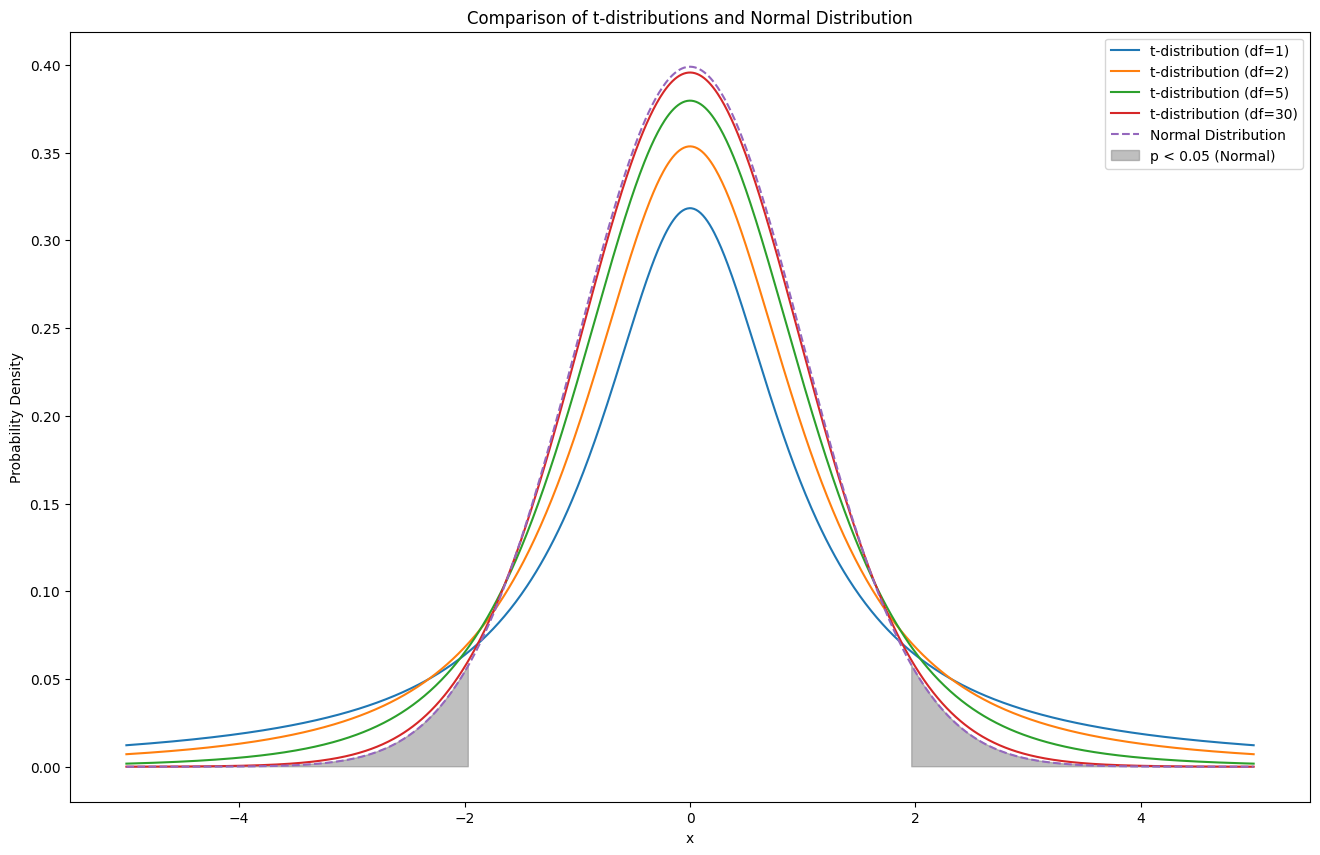

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t, norm

# Generate data points
x = np.linspace(-5, 5, 1000)
plt.figure(figsize=(16, 10))
# Generate t-distributions for different degrees of freedom
for df in [1, 2, 5, 30]:
    y_t = t.pdf(x, df=df)
    plt.plot(x, y_t, label=f't-distribution (df={df})')

# Generate normal distribution
y_norm = norm.pdf(x, 0, 1)

plt.plot(x, y_norm, label='Normal Distribution', linestyle='--')

# Mark the tails for p < 0.05 in the normal distribution
critical_value_05 = norm.ppf(1 - 0.025)
plt.fill_between(x, y_norm, where=(x <= -critical_value_05) | (x >= critical_value_05), color='gray', alpha=0.5, label='p < 0.05 (Normal)')

# Labels and title
plt.title('Comparison of t-distributions and Normal Distribution')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()

plt.show()

## ROC Curves and AUC

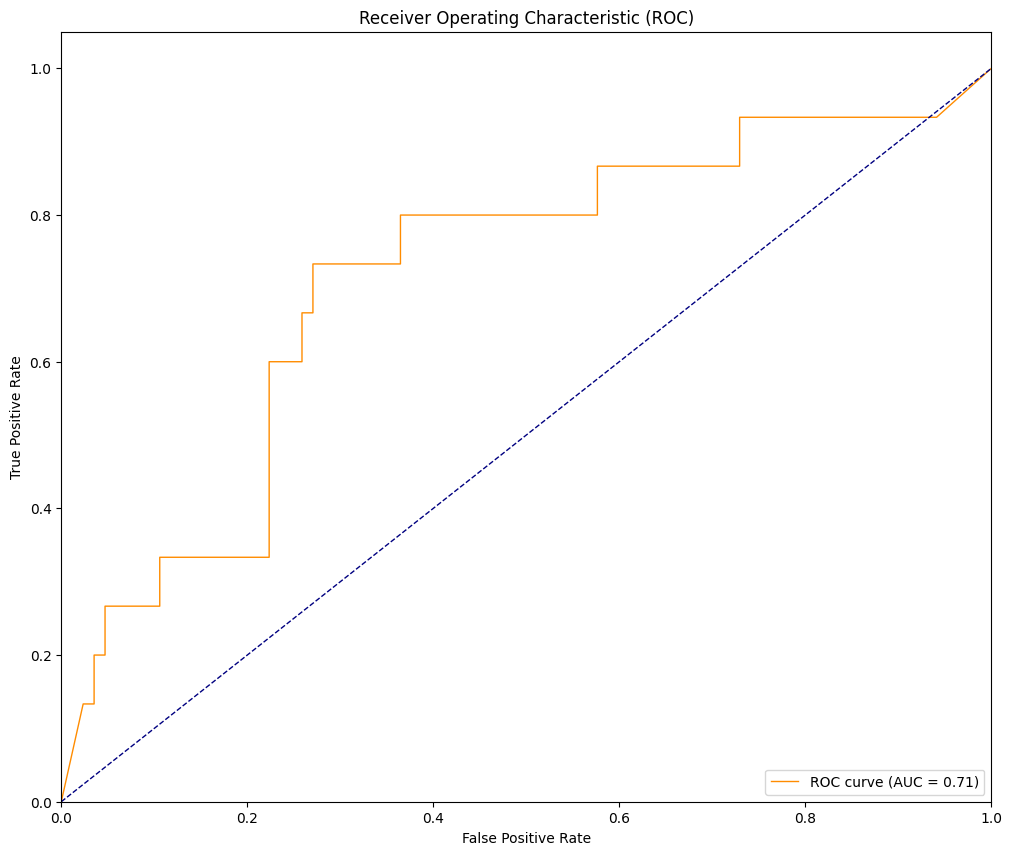

In [7]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Generate synthetic data
np.random.seed(0)
n_samples = 100

# Generate true labels (40% of them are positive)
y_true = np.random.choice([0, 1], size=n_samples, p=[0.8, 0.2])

# Generate predicted probabilities
y_score = np.linspace(0, 1, n_samples)
np.random.shuffle(y_score)

# Introduce some noise to make it more realistic
y_score = y_score + np.random.normal(0, 0.1, n_samples)
y_score = np.clip(y_score, 0, 1)

# Compute ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_true, y_score)
roc_auc = roc_auc_score(y_true, y_score)

# Plot the ROC curve
plt.figure(figsize=(12,10))
plt.plot(fpr, tpr, color='darkorange', lw=1, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Exercise 1

1. Heteroscedasticity refers to data where variance is not the same across the data. How does this influence your statistics?  
    1. Generate some linear data with noise that increases as a function of x, and another with noise that is constant throughout the range of values. 
    2. Calculate Adj. R^2, AIC, BIC, and p-values for your coeffients.
    3. How does the noise influence your outcomes?  
    4. Can you find a setting where the two curves have roughly the same measures, even though the types of noise varies?
    5. What does this tell you?

# Train and Test

## Stratification

Run the following multiple times to get a sense of how stratification influences things

In [36]:
from sklearn.model_selection import train_test_split
import numpy as np

# Generate some example data
# 95% class 0, 5% class 1
y = np.array([0]*950 + [1]*20 + [2]*10 + [3]*5)

# Without stratification
X_train, X_test, y_train, y_test = train_test_split(np.arange(len(y)), y, test_size=0.2, stratify=None)
print('Without Stratification')
print('Test set class distribution:', np.bincount(y_test))

# With stratification
X_train, X_test, y_train, y_test = train_test_split(np.arange(len(y)), y, test_size=0.2, stratify=y)
print('With Stratification')
print('Test set class distribution:', np.bincount(y_test))

Without Stratification
Test set class distribution: [193   3   1]
With Stratification
Test set class distribution: [190   4   2   1]


## N-fold cross validation

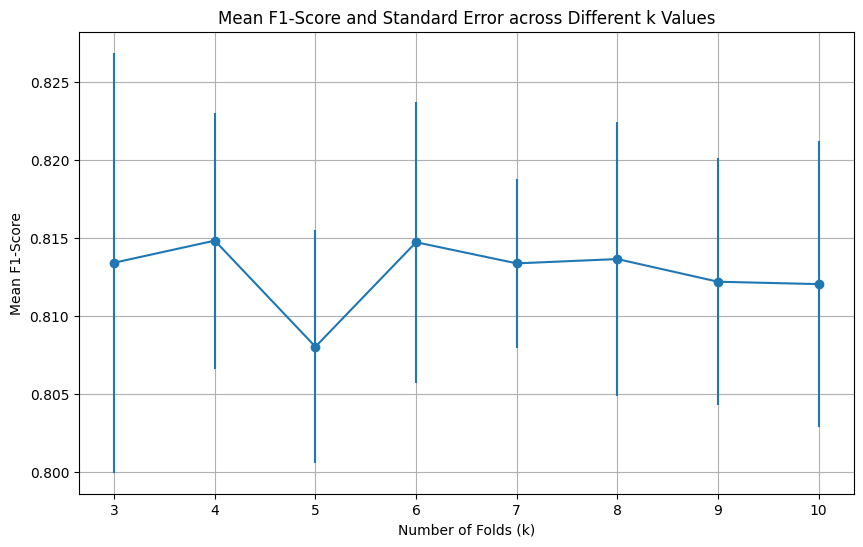

In [37]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, 
                           n_informative=15, n_redundant=5, 
                           n_classes=2, random_state=42)

# Initialize logistic regression model
clf = LogisticRegression()

# List to store mean and std. err of F1-scores for each k
mean_f1_scores = []
std_err_f1_scores = []

# K values to use for k-fold CV
k_values = list(range(3, 11))

# Perform k-fold CV for each k and collect mean and std. err of F1-score
for k in k_values:
    f1_scores = cross_val_score(clf, X, y, cv=k, scoring='f1')
    mean_f1_scores.append(np.mean(f1_scores))
    std_err_f1_scores.append(np.std(f1_scores) / np.sqrt(k))

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(k_values, mean_f1_scores, yerr=std_err_f1_scores, marker='o', linestyle='-')
plt.xlabel('Number of Folds (k)')
plt.ylabel('Mean F1-Score')
plt.title('Mean F1-Score and Standard Error across Different k Values')
plt.grid(True)
plt.show()

## Leave one out validation

In [38]:
from sklearn.model_selection import LeaveOneOut
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import numpy as np

# Generate some example data
X, y = make_classification(n_samples=50, n_features=5, random_state=42)

# Initialize LeaveOneOut and the model
loo = LeaveOneOut()
model = LogisticRegression()

f1_scores = []

# Perform Leave-One-Out Cross-validation
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model.fit(X_train, y_train)
    f1_score = model.score(X_test, y_test)
    f1_scores.append(f1_score)

# Compute mean and standard error
mean_f1_score = np.mean(f1_scores)
stderr_f1_score = np.std(f1_scores) / np.sqrt(len(f1_scores))

print(f"Mean F1-Score: {mean_f1_score}")
print(f"Standard Error: {stderr_f1_score}")

Mean F1-Score: 0.94
Standard Error: 0.033585711247493336


# Exercise 2

There are many utilities in scikit-learn to handle complex k-fold cross-validation instances; you can read more [here](https://scikit-learn.org/stable/modules/cross_validation.html).  In the following, I'd like you to explore the API a little further.

1. Load the iris dataset (`from sklearn.datasets import load_iris`)
2. Label iris-setosa as class 1 and all others as class 0
3. Try using both KFold and StratifiedKFold classes to build classifiers.
4. Comparse performance across splits ranging from 3 - 10.
5. What is the impact of stratification?

In [41]:
from sklearn.datasets import load_iris
data = load_iris()
X,y = data.data,data.target

# Resampling

In [43]:
!pip install imblearn

  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/a3/9e/fbe60a768502af54563dcb59ca7856f5a8833b3ad5ada658922e1ab09b7f/imbalanced_learn-0.11.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 7.5 MB/s eta 0:00:00


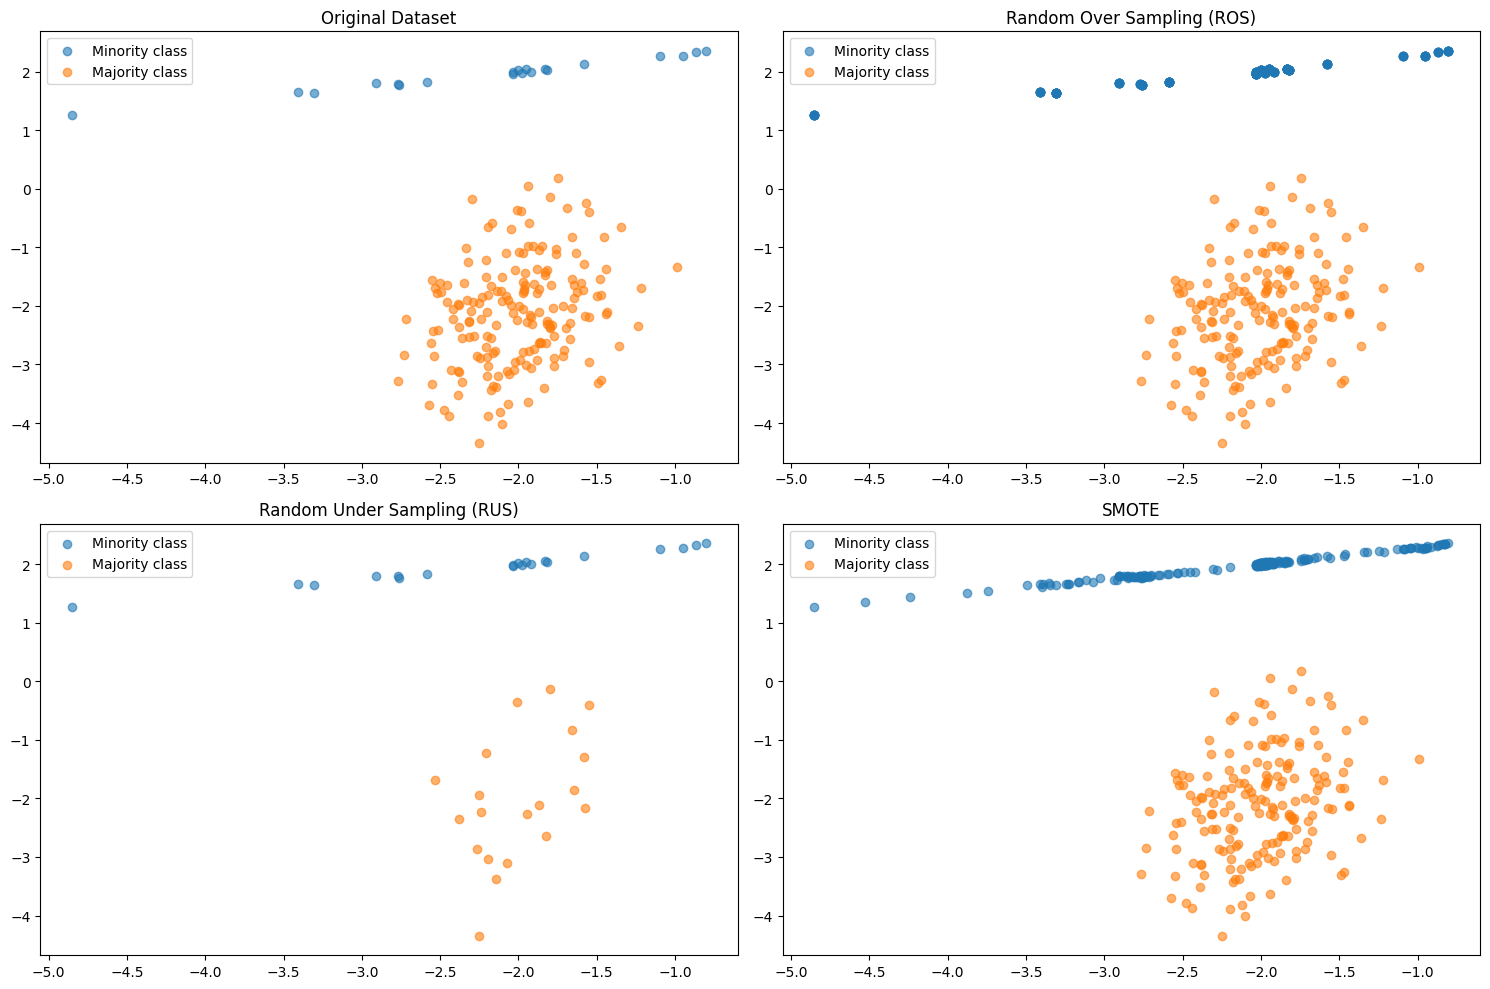

In [44]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification

# Create a 2D imbalanced dataset
X, y = make_classification(n_classes=2, class_sep=2,
                           weights=[0.1, 0.9], n_informative=2, n_redundant=0,
                           flip_y=0, n_features=2, n_clusters_per_class=1,
                           n_samples=200, random_state=10)

# Apply Random Over Sampler
ros = RandomOverSampler(random_state=42)
X_resampled_ros, y_resampled_ros = ros.fit_resample(X, y)

# Apply Random Under Sampler
rus = RandomUnderSampler(random_state=42)
X_resampled_rus, y_resampled_rus = rus.fit_resample(X, y)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X, y)

# Scatter plot code to visualize before and after effects of each technique
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes[0,0].scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Minority class', alpha=0.6)
axes[0,0].scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Majority class', alpha=0.6)
axes[0,0].set_title('Original Dataset')
axes[0,0].legend()

axes[0,1].scatter(X_resampled_ros[y_resampled_ros == 0][:, 0], X_resampled_ros[y_resampled_ros == 0][:, 1], label='Minority class', alpha=0.6)
axes[0,1].scatter(X_resampled_ros[y_resampled_ros == 1][:, 0], X_resampled_ros[y_resampled_ros == 1][:, 1], label='Majority class', alpha=0.6)
axes[0,1].set_title('Random Over Sampling (ROS)')
axes[0,1].legend()

axes[1,0].scatter(X_resampled_rus[y_resampled_rus == 0][:, 0], X_resampled_rus[y_resampled_rus == 0][:, 1], label='Minority class', alpha=0.6)
axes[1,0].scatter(X_resampled_rus[y_resampled_rus == 1][:, 0], X_resampled_rus[y_resampled_rus == 1][:, 1], label='Majority class', alpha=0.6)
axes[1,0].set_title('Random Under Sampling (RUS)')
axes[1,0].legend()

axes[1,1].scatter(X_resampled_smote[y_resampled_smote == 0][:, 0], X_resampled_smote[y_resampled_smote == 0][:, 1], label='Minority class', alpha=0.6)
axes[1,1].scatter(X_resampled_smote[y_resampled_smote == 1][:, 0], X_resampled_smote[y_resampled_smote == 1][:, 1], label='Majority class', alpha=0.6)
axes[1,1].set_title('SMOTE')
axes[1,1].legend()

plt.tight_layout()
plt.show()


# Exercise 3

Class rebalancing is tricky, and doesn't always yeild the results you want.  In the following, try working with the `breast_cancer` dataset in scikit-learn to try to explore different resampling techniques.

1. Load and preprocess the data; check class distribution
2. Note that your logistic regression might not converge - why do you think that is?  Can you fix it?
3. Try random undersampling, random oversampling, and SMOTE.  Compare precision, recall, F1 scores, and crosstabs.  What works the best?

In [ ]:
from sklearn.datasets import load_breast_cancer
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix


data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = LogisticRegression()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)



# Evaluating clusters

## The Elbow Method

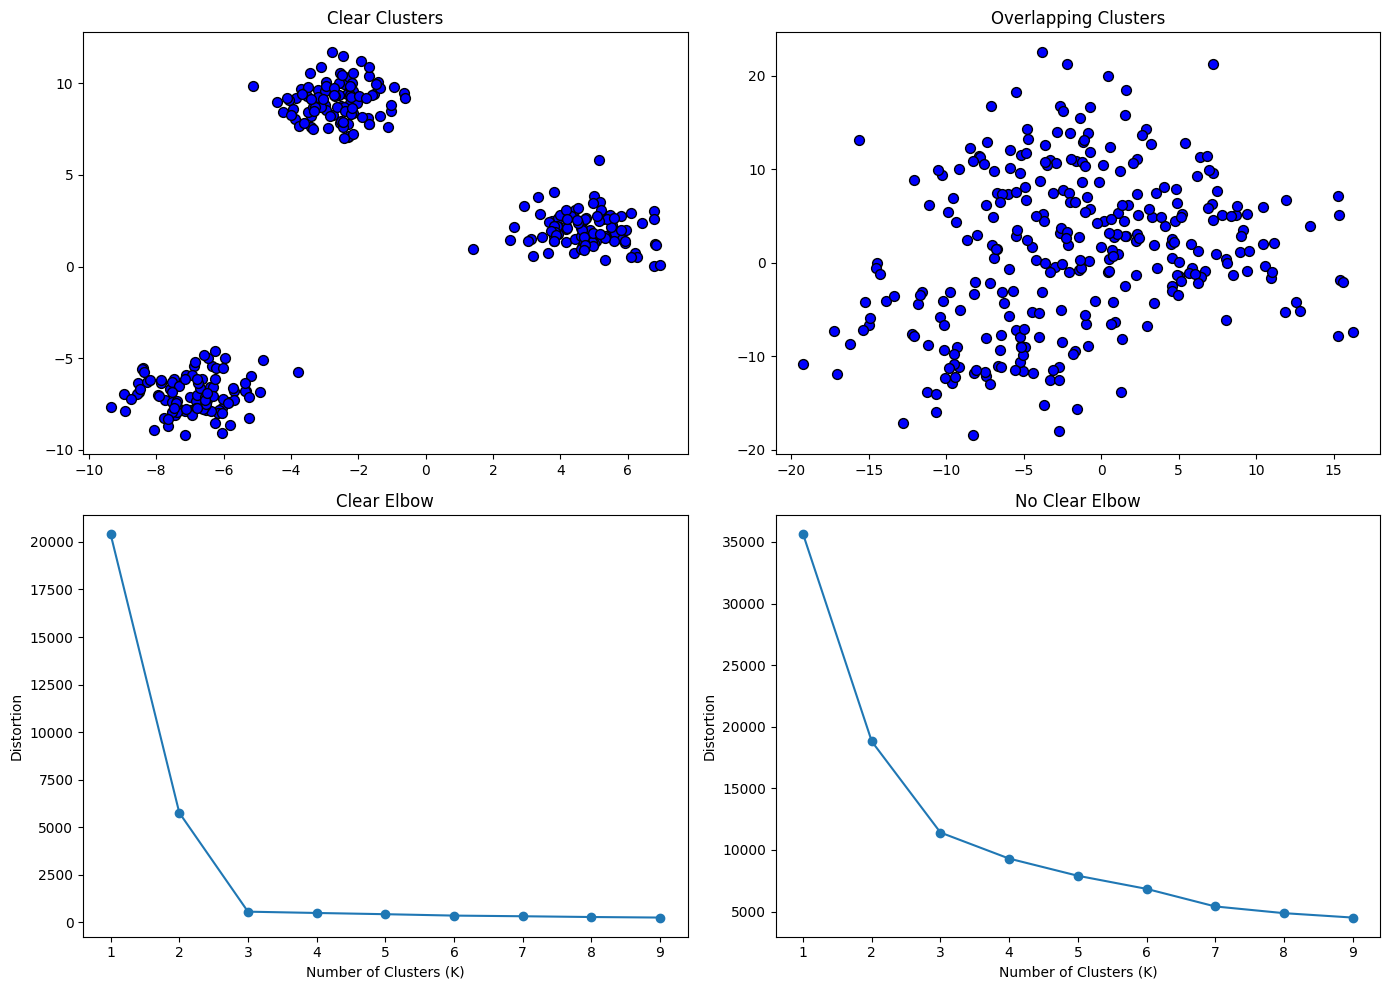

In [56]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic data with 3 clear clusters
X1, y1 = make_blobs(n_samples=300, centers=3, random_state=42, cluster_std=1.0)

# Generate synthetic data with no clear clusters (high standard deviation)
X2, y2 = make_blobs(n_samples=300, centers=3, random_state=42, cluster_std=5)

# Function to apply KMeans and plot elbow graph
def plot_elbow(ax, X, title):
    distortions = []
    K = range(1, 10)
    for k in K:
        kmeans = KMeans(n_clusters=k,n_init='auto')
        kmeans.fit(X)
        distortions.append(kmeans.inertia_)
    
    ax.plot(K, distortions, marker='o')
    ax.set_title(title)
    ax.set_xlabel('Number of Clusters (K)')
    ax.set_ylabel('Distortion')

# Function to plot data
def plot_data(ax, X, title):
    ax.scatter(X[:, 0], X[:, 1], c='blue', marker='o', edgecolor='black', s=50)
    ax.set_title(title)

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot data and elbow graphs
plot_data(axes[0, 0], X1, 'Clear Clusters')
plot_data(axes[0, 1], X2, 'Overlapping Clusters')
plot_elbow(axes[1, 0], X1, 'Clear Elbow')
plot_elbow(axes[1, 1], X2, 'No Clear Elbow')

plt.tight_layout()
plt.show()

## Silhouhtte analysis

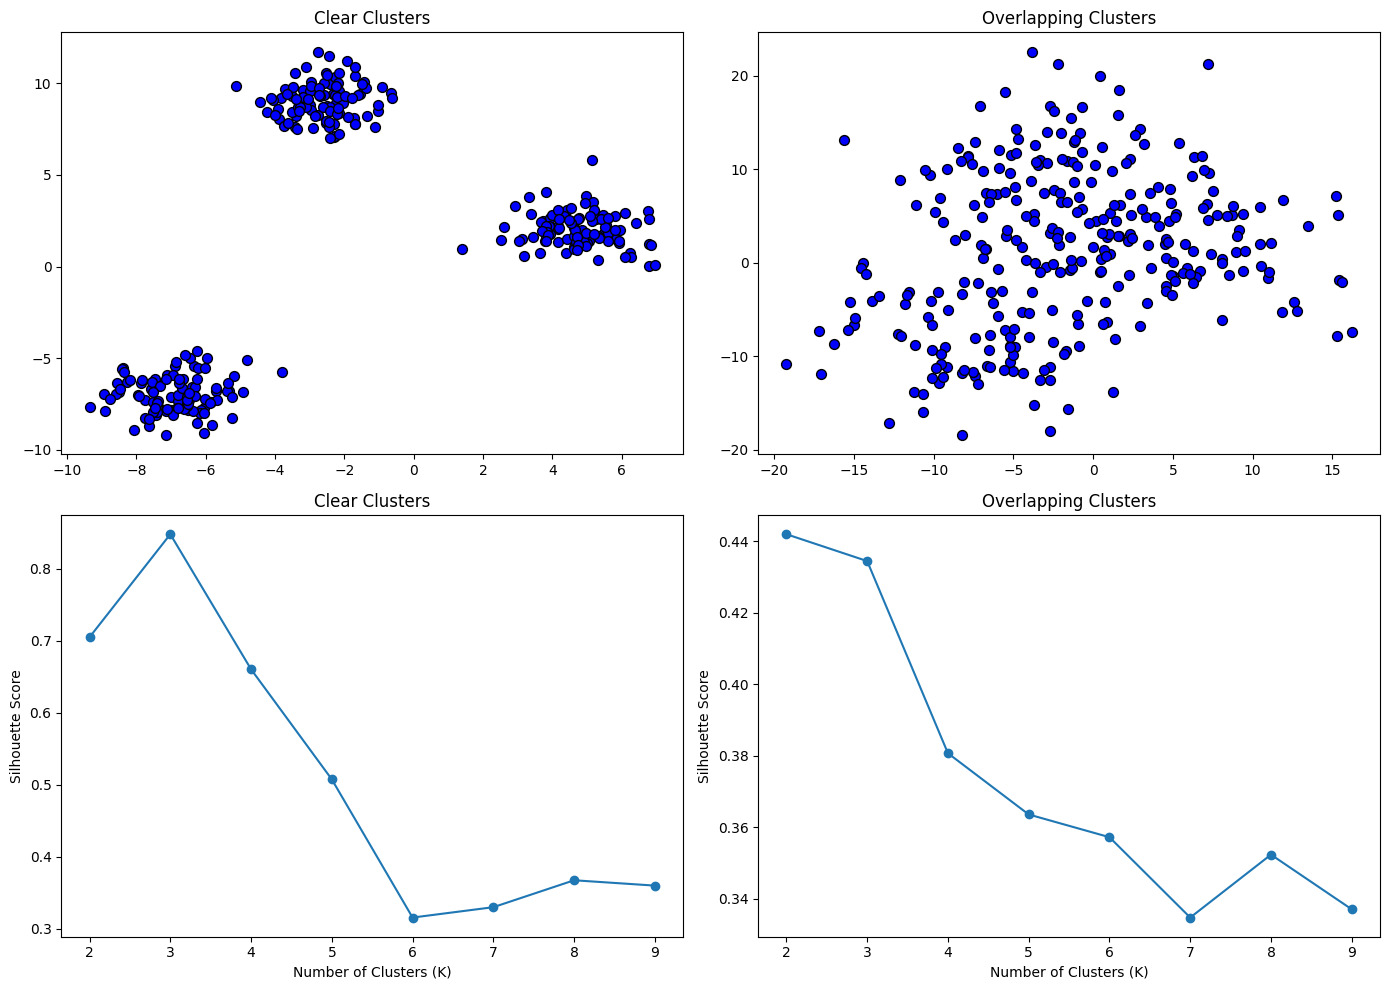

In [57]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Generate synthetic data with 3 clear clusters
X1, y1 = make_blobs(n_samples=300, centers=3, random_state=42, cluster_std=1.0)

# Generate synthetic data with no clear clusters (high standard deviation)
X2, y2 = make_blobs(n_samples=300, centers=3, random_state=42, cluster_std=5)

# Function to apply KMeans and plot silhouette scores
def plot_silhouette(ax, X, title):
    silhouette_scores = []
    K = range(2, 10)  # silhouette_score requires at least 2 clusters
    for k in K:
        kmeans = KMeans(n_clusters=k,n_init='auto')
        kmeans.fit(X)
        silhouette_scores.append(silhouette_score(X, kmeans.labels_))
    
    ax.plot(K, silhouette_scores, marker='o')
    ax.set_title(title)
    ax.set_xlabel('Number of Clusters (K)')
    ax.set_ylabel('Silhouette Score')

# Function to plot data
def plot_data(ax, X, title):
    ax.scatter(X[:, 0], X[:, 1], c='blue', marker='o', edgecolor='black', s=50)
    ax.set_title(title)

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot data and silhouette graphs
plot_data(axes[0, 0], X1, 'Clear Clusters')
plot_data(axes[0, 1], X2, 'Overlapping Clusters')
plot_silhouette(axes[1, 0], X1, 'Clear Clusters')
plot_silhouette(axes[1, 1], X2, 'Overlapping Clusters')

plt.tight_layout()
plt.show()

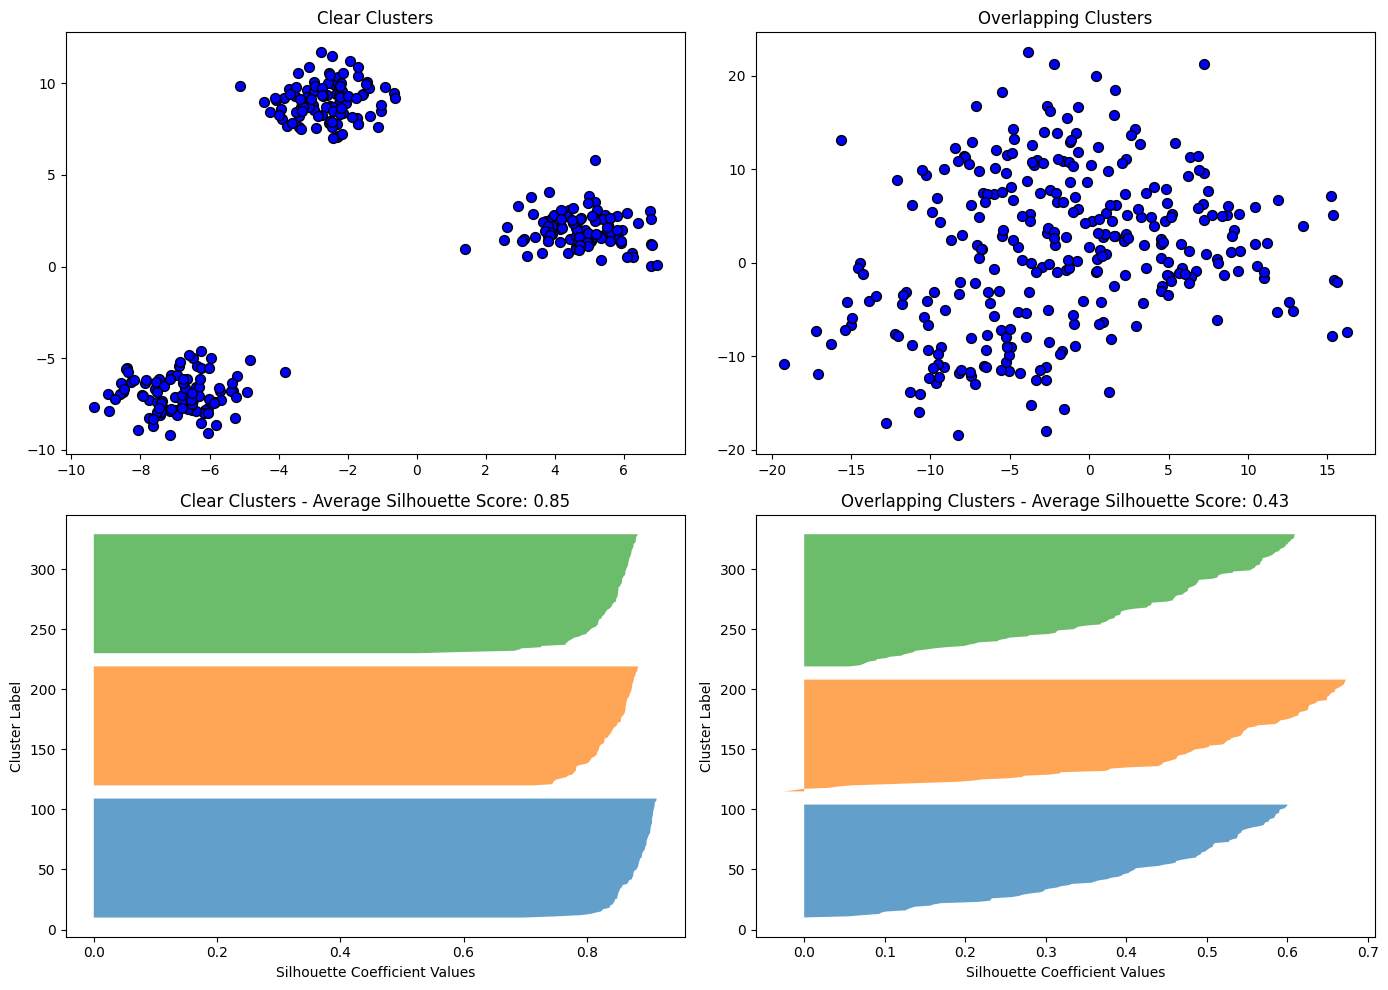

In [60]:
from sklearn.metrics import silhouette_score, silhouette_samples
import numpy as np

# Function to apply KMeans and plot silhouette graph
def plot_silhouette(ax, X, title):
    # List to store average silhouette scores for different number of clusters
    avg_silhouette_scores = []
    K = [3]  # Start from 2 as silhouette score requires at least 2 clusters
    
    for k in K:
        kmeans = KMeans(n_clusters=k,n_init='auto')
        cluster_labels = kmeans.fit_predict(X)
        
        # Calculate the silhouette score for the current number of clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        avg_silhouette_scores.append(silhouette_avg)
        
        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)
        
        # Plot silhouette scores for each cluster
        y_lower = 10  # For space between silhouette plots of individual clusters
        for i in range(k):
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
            ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, alpha=0.7)
            y_lower = y_upper + 10

    ax.set_title(f"{title} - Average Silhouette Score: {silhouette_avg:.2f}")
    ax.set_xlabel("Silhouette Coefficient Values")
    ax.set_ylabel("Cluster Label")

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot data and silhouette graphs
plot_data(axes[0, 0], X1, 'Clear Clusters')
plot_data(axes[0, 1], X2, 'Overlapping Clusters')
plot_silhouette(axes[1, 0], X1, 'Clear Clusters')
plot_silhouette(axes[1, 1], X2, 'Overlapping Clusters')

plt.tight_layout()
plt.show()